In [1]:
#adapted from https://medium.com/datadriveninvestor/a-simple-guide-to-creating-predictive-models-in-python-part-1-8e3ddc3d7008

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#import csv from directory and read values 

import os
import pandas as pd
directory = "/content/sample_data"

for filename in os.listdir(directory):
    if filename.endswith("PowerProduction.csv"):
        print(directory+filename)
        newcsv = directory+filename
        csvnNewWO = os.path.join(directory,filename)


csv_df_2 = pd.read_csv(csvnNewWO)
csv_df_2.head()
print (csv_df_2.head())

/content/sample_dataPowerProduction.csv
   speed  power
0  0.000    0.0
1  0.125    0.0
2  0.150    0.0
3  0.225    0.0
4  0.275    0.0


In [3]:
#remove values with 0 adaptd from https://stackoverflow.com/questions/22649693/drop-rows-with-all-zeros-in-pandas-data-frame
df = csv_df_2
df = df[(df.power > 0)]
df


,speed,power
5,0.325,4.331
6,0.400,5.186
7,0.450,3.826
8,0.501,1.048
9,0.526,5.553
...,...,...
485,24.249,103.700
486,24.299,93.694
487,24.349,93.078
488,24.374,98.223


In [4]:
#find outliers in speed adapted from https://stackoverflow.com/questions/23199796/detect-and-exclude-outliers-in-pandas-data-frame

q = df["speed"].quantile(0.99)
q

24.224000000000004

In [5]:
#do the same fro power 

q = df["power"].quantile(0.99)
q
df

,speed,power
5,0.325,4.331
6,0.400,5.186
7,0.450,3.826
8,0.501,1.048
9,0.526,5.553
...,...,...
485,24.249,103.700
486,24.299,93.694
487,24.349,93.078
488,24.374,98.223


In [6]:
#remove thoes greater then the quantile 

df = df[df["speed"] < q]
df


,speed,power
5,0.325,4.331
6,0.400,5.186
7,0.450,3.826
8,0.501,1.048
9,0.526,5.553
...,...,...
485,24.249,103.700
486,24.299,93.694
487,24.349,93.078
488,24.374,98.223


In [7]:
df = df[df["power"] < q]
df

,speed,power
5,0.325,4.331
6,0.400,5.186
7,0.450,3.826
8,0.501,1.048
9,0.526,5.553
...,...,...
485,24.249,103.700
486,24.299,93.694
487,24.349,93.078
488,24.374,98.223


In [8]:
#adapted from https://towardsdatascience.com/machine-learning-simple-linear-regression-with-python-f04ecfdadc13
# Importing the dataset

X = df.iloc[:, :-1].values #get a copy of dataset exclude last column
y = df.iloc[:, 1].values #get array of dataset in column 1st

In [9]:

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=0)

In [10]:
# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

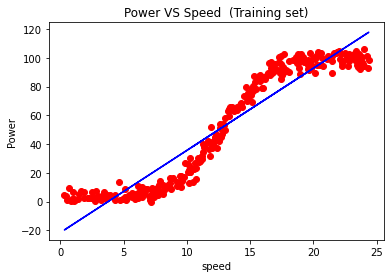

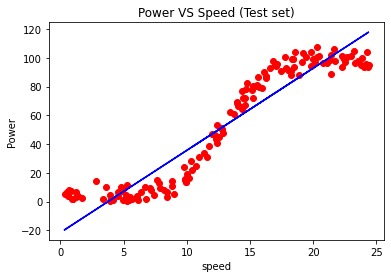

In [11]:

# Visualizing the Training set results
viz_train = plt
viz_train.scatter(X_train, y_train, color='red')
viz_train.plot(X_train, regressor.predict(X_train), color='blue')
viz_train.title('Power VS Speed  (Training set)')
viz_train.xlabel('speed')
viz_train.ylabel('Power')
viz_train.show()

# Visualizing the Test set results
viz_test = plt
viz_test.scatter(X_test, y_test, color='red')
viz_test.plot(X_train, regressor.predict(X_train), color='blue')
viz_test.title('Power VS Speed (Test set)')
viz_test.xlabel('speed')
viz_test.ylabel('Power')
viz_test.show()

In [12]:
pip install streamlit

In [14]:


import streamlit as st

from sklearn import datasets

st.write("""
Wind Power Predicter based on Speed input 
""")

st.sidebar.header('User Input Parameters')

# An input is requested and stored in a variable
test_text = input ("Enter a wind speed: ")

# Converts the string into a integer. If you need
# to convert the user input into decimal format,
# the float() function is used instead of int()
test_number = float(test_text)

# Prints in the console the variable as requested
print ("The number you entered is: ", test_number)

Enter a wind speed: 24
The number you entered is:  24.0


In [15]:
#adapted from https://datascience.stackexchange.com/questions/53048/expected-2d-array-got-scalar-array-instead/53054

y_pred = regressor.predict((np.array([test_number]).reshape(1, 1)))
y_pred

array([115.57992302])